<a href="https://colab.research.google.com/github/hoantran14/CNN/blob/main/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 283 images belonging to 18 classes.
Found 62 images belonging to 18 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 18)                  │           2,322 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,306,962 (12.62 MB)

 Trainable params: 3,306,962 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 150s 17s/step - accuracy: 0.0668 - loss: 2.9311 - val_accuracy: 0.1129 - val_loss: 2.7868
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.0816 - loss: 2.8274 - val_accuracy: 0.1290 - val_loss: 2.7452
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.1419 - loss: 2.7971 - val_accuracy: 0.1774 - val_loss: 2.6854
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.1246 - loss: 2.7023 - val_accuracy: 0.1935 - val_loss: 2.6117
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.1698 - loss: 2.6849 - val_accuracy: 0.1452 - val_loss: 2.5958
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.2183 - loss: 2.6355 - val_accuracy: 0.2097 - val_loss: 2.5459
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.1883 - loss: 2.5760 - val_accuracy: 0.2419 - val_loss: 2.5596
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.1803 - loss: 2.5704 - val_accuracy: 0.2419 - val_loss: 2.464

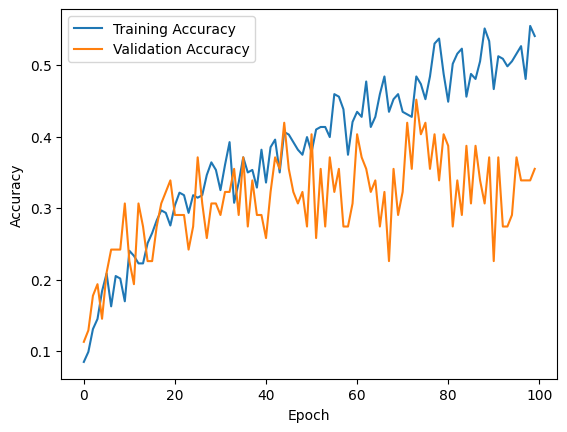

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Món ăn tiên đoán: Bánh chưng


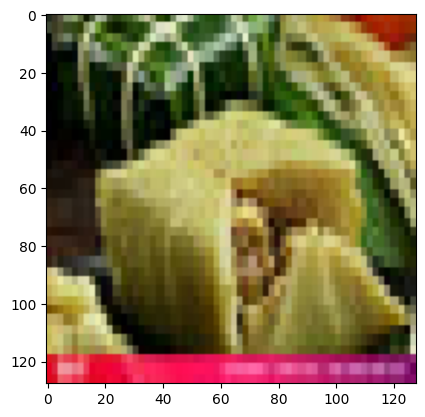

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img



train_dir = "/content/drive/MyDrive/Dữ liệu cho AI/Foods"


img_width, img_height = 128, 128
batch_size = 32


train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2
)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)


validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


epochs = 100
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

path = "/content/drive/MyDrive/Dữ liệu cho AI/Foods/Bánh chưng/124d0141941t72527l0.jpg"

img = load_img(path, target_size=(img_width, img_height))
plt.imshow(img)
img = np.array(img) / 255.0
img = img.reshape(1, img_width, img_height, 3)

prediction = np.argmax(model.predict(img), axis=-1)


class_labels = {v: k for k, v in train_generator.class_indices.items()}
food = class_labels[prediction[0]]
print(f"Món ăn tiên đoán: {food}")
